# Exploring Stock Market Data

## Step 1: Define the Dates and Ticker Variables

These variables will be used at the end to generate a summary of the insights.

In [1]:
start_date = '2024-10-24'
end_date = '2025-10-23'
ticker = 'AAPL'

## Step 2: Download Apple Stock Data

In [2]:
import yfinance as yf

# Download Apple (AAPL) data for the specified period
aapl = yf.download('AAPL', start='2024-10-24', end='2025-10-23')

# Display the first few rows
print(aapl.head())

/usr/local/lib/python3.11/site-packages/yfinance/multi.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  original_output = yfinance_original_download(
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
Use cached data instead due to an error downloading data


Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-10-24  229.501907  229.750749  227.351910  228.914629  31109500
2024-10-25  230.338013  232.139626  228.506540  228.675751  38802300
2024-10-28  232.318787  233.642627  231.472733  232.239171  36087100
2024-10-29  232.587540  233.244486  231.243803  232.020188  35417200
2024-10-30  229.034088  232.388472  228.486633  231.532455  47070900


- Print the columns of the DataFrame `aapl`: `aapl.columns`

In [3]:
aapl.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

- Flatten the columns of the DataFrame using a prompt like this:
  > The DataFrame aapl has multiIndexed columns [('Close','AAPL'),('High','AAPL'),('Low','AAPL'),('Open','AAPL'),('Volume','AAPL')]. Flatten the columns by removing 'AAPL'.

In [4]:
# Flatten multi-indexed columns
aapl.columns = aapl.columns.droplevel(1)

# Display the updated DataFrame
print(aapl.head())

Price            Close        High         Low        Open    Volume
Date                                                                
2024-10-24  229.501907  229.750749  227.351910  228.914629  31109500
2024-10-25  230.338013  232.139626  228.506540  228.675751  38802300
2024-10-28  232.318787  233.642627  231.472733  232.239171  36087100
2024-10-29  232.587540  233.244486  231.243803  232.020188  35417200
2024-10-30  229.034088  232.388472  228.486633  231.532455  47070900


## Step 3: Calculate Basic Statistics & Metrics

- Calculate the basic descriptive statistics of the DataFrame:
  > Display the shape and statistical summary of the DataFrame aapl.

In [5]:
# Display the shape of the DataFrame
print("Shape of aapl:", aapl.shape)

# Display the statistical summary
print("\nStatistical Summary:")
print(aapl.describe())

Shape of aapl: (249, 5)

Statistical Summary:
Price       Close        High         Low        Open        Volume
count  249.000000  249.000000  249.000000  249.000000  2.490000e+02
mean   224.957396  227.273417  222.369993  224.635081  5.421537e+07
std     18.868477   18.431105   19.040953   18.838291  2.333789e+07
min    171.998993  189.875235  168.796839  171.530131  2.323470e+07
25%    209.771927  211.721759  207.484525  209.692012  4.012770e+07
50%    227.094116  229.300003  224.690002  226.366414  4.722760e+07
75%    238.742462  241.320007  236.370912  238.970001  5.736570e+07
max    262.769989  265.290009  261.829987  262.649994  1.843959e+08


- Calculate the total return:
  > Use the Close column of DataFrame aapl to find the total return in percentage (`total_return`) based on the start price and end price.

In [6]:
# Calculate total return in percentage
start_price = aapl['Close'].iloc[0]
end_price = aapl['Close'].iloc[-1]

total_return = ((end_price - start_price) / start_price) * 100

print(f"Total return: {total_return:.2f}%")

Total return: 12.61%


## Step 4: Visualize the Closing Price

- Visualize Apple's Closing price, use a prompt like this:
  > Create a line chart showing the closing price trend using the column 'Close' of the DataFrame `aapl`.
  >
  > Use matplotlib to create a professional-looking chart with:
  > - Clear title and axis labels
  > - Grid for readability
  > - Appropriate colors and styling

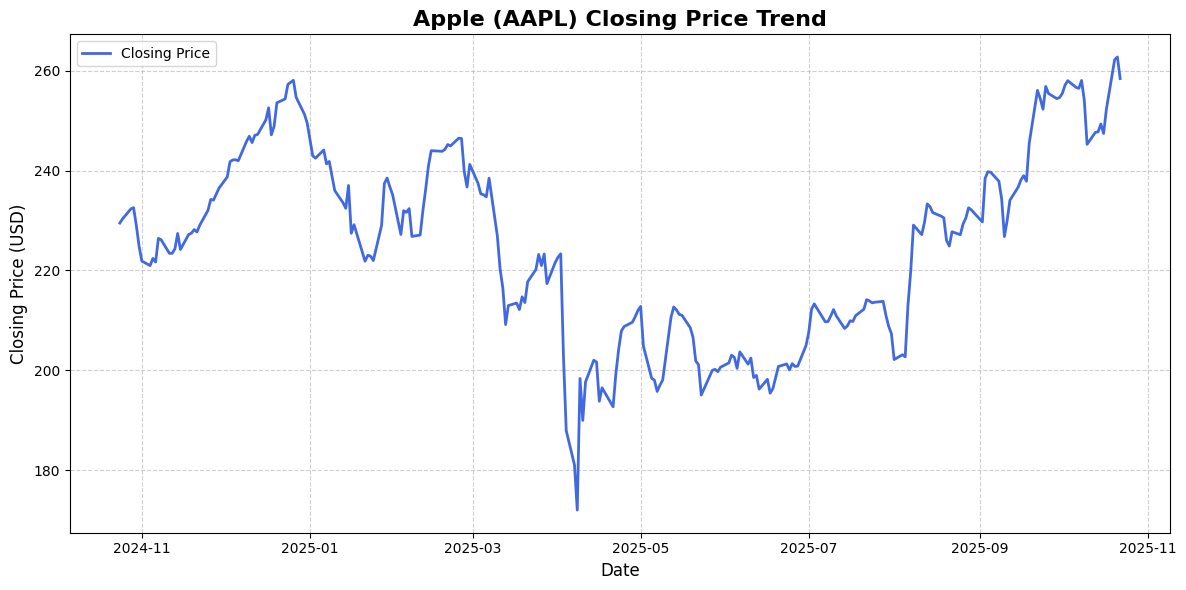

In [7]:
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Plot the 'Close' column with a color and line width
plt.plot(aapl['Close'], color='royalblue', linewidth=2, label='Closing Price')

# Add title and axis labels
plt.title('Apple (AAPL) Closing Price Trend', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend
plt.legend()

# Optional: Improve layout
plt.tight_layout()

# Display the chart
plt.show()

- To find the dates that correspond to the peak and lowest prices, use a prompt like this:
  > Use the Close column of aapl dataFrame to find and print:
  > - the peak date (in a variable called `peak_date`) that corresponds to the maximum closing price `peak_price`
  > - the lowest date (in a variable called `lowest_date`) that corresponds to the minimum closing price `lowest_price`
  >
  > Update the above code to show the peak and low prices in the line chart.

Peak Date: 2025-10-21 00:00:00, Peak Price: 262.77
Lowest Date: 2025-04-08 00:00:00, Lowest Price: 172.00


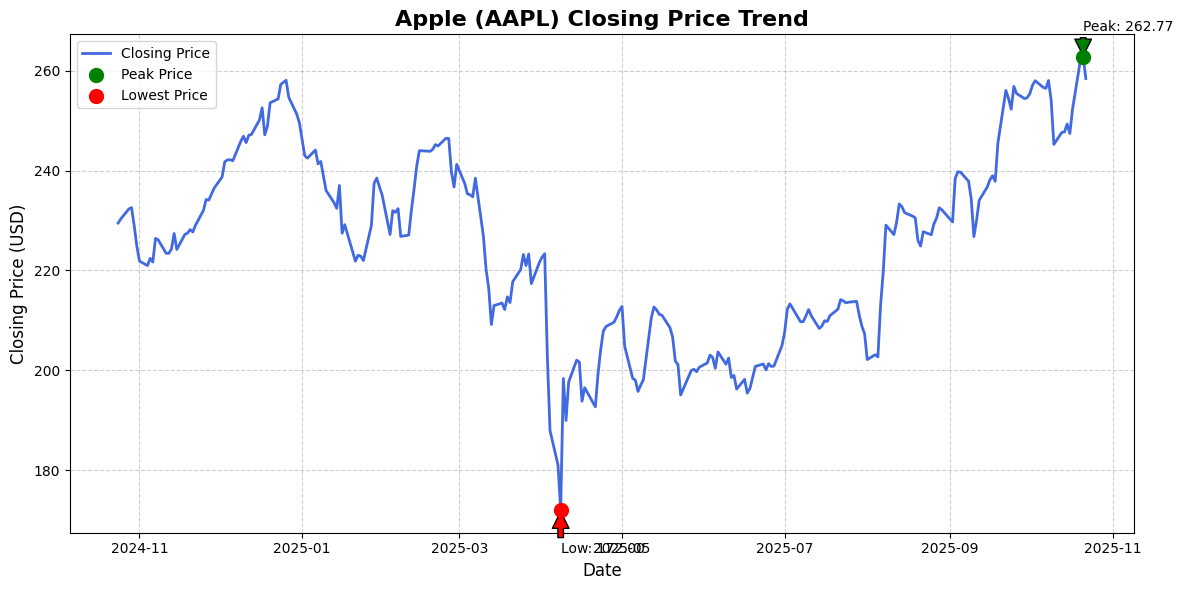

In [8]:
import matplotlib.pyplot as plt

# Find peak (max) and lowest (min) closing prices and their dates
peak_price = aapl['Close'].max()
lowest_price = aapl['Close'].min()

peak_date = aapl['Close'].idxmax()
lowest_date = aapl['Close'].idxmin()

print(f"Peak Date: {peak_date}, Peak Price: {peak_price:.2f}")
print(f"Lowest Date: {lowest_date}, Lowest Price: {lowest_price:.2f}")

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(aapl['Close'], color='royalblue', linewidth=2, label='Closing Price')

# Highlight peak and lowest points
plt.scatter(peak_date, peak_price, color='green', s=100, label='Peak Price', zorder=5)
plt.scatter(lowest_date, lowest_price, color='red', s=100, label='Lowest Price', zorder=5)

# Annotate the points
plt.annotate(f'Peak: {peak_price:.2f}',
             xy=(peak_date, peak_price),
             xytext=(peak_date, peak_price * 1.02),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=10)

plt.annotate(f'Low: {lowest_price:.2f}',
             xy=(lowest_date, lowest_price),
             xytext=(lowest_date, lowest_price * 0.95),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10)

# Add title and labels
plt.title('Apple (AAPL) Closing Price Trend', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Improve layout
plt.tight_layout()

# Show the chart
plt.show()

- To find the context related to the peak and lowest date, use a prompt like this:
  > For the `peak_date` and `lowest_date`, search for related Apple news using Serper. The Serper API key is saved in a .env file. Store the snippets of the found articles in a json string `news_snippets` that has these fields: peak_date, lowest_date, peak_news_snippets, lowest_news_snippets.

<span style="color:green; font-weight:bold;">Note:</span> The `SERPER_API_KEY` variable is already defined in this environment, you do not need to create  an `.env` file. 

In [9]:
import os
import json
import requests
from dotenv import load_dotenv

# Load the Serper API key from the .env file
load_dotenv()
SERPER_API_KEY = os.getenv("SERPER_API_KEY")

# Define a helper function to query Serper API
def search_serper(query):
    url = "https://google.serper.dev/news"
    headers = {
        "X-API-KEY": SERPER_API_KEY,
        "Content-Type": "application/json"
    }
    data = {"q": query}
    response = requests.post(url, headers=headers, json=data)

    if response.status_code == 200:
        articles = response.json().get("news", [])
        # Collect a few top snippets
        snippets = [article.get("snippet", "") for article in articles[:5]]
        return snippets
    else:
        print(f"Serper API request failed: {response.status_code} - {response.text}")
        return []

# Build the search queries using the peak and lowest dates
peak_query = f"Apple stock news around {peak_date.strftime('%Y-%m-%d')}"
lowest_query = f"Apple stock news around {lowest_date.strftime('%Y-%m-%d')}"

# Fetch news snippets for both dates
peak_news_snippets = search_serper(peak_query)
lowest_news_snippets = search_serper(lowest_query)

# Store snippets and metadata in a JSON string
news_snippets = json.dumps({
    "peak_date": str(peak_date),
    "lowest_date": str(lowest_date),
    "peak_news_snippets": peak_news_snippets,
    "lowest_news_snippets": lowest_news_snippets
}, indent=4)

print(news_snippets)

{
    "peak_date": "2025-10-21 00:00:00",
    "lowest_date": "2025-04-08 00:00:00",
    "peak_news_snippets": [
        "Major stock indexes declined Thursday as investors digested several big tech earnings reports and awaited more after the closing bell.",
        "The Dow Jones Industrial Average had a record-setting session on Tuesday, boosted by strong earnings reports from companies such as Coca-Cola and 3M.",
        "The Dow hit its 12th record of 2025 on Tuesday, while the S&P 500 was flat and the Nasdaq fell as earnings reports delivered.",
        "The S&P 500 is nearing another record, but some analysts caution that a host of factors may stall its momentum.",
        "Apple (AAPL) traded at $265.91 as of 2:48 p.m. UTC on 27 October 2025, within an intraday range of $259.23\u2013$266.19."
    ],
    "lowest_news_snippets": [
        "Recent Articles on Apple CDR (CAD Hedged) (AAPL:CA). (AAPL) Financial Trading Report October 28, 2025, 04:45 AM; (AAPL) Equity Market Report..."

## Step 5: Analyze Volatility

- To calculate the signal's volatility, use a prompt like this: 
  >In the DataFrame aapl, find the overall volatility in percentage using the column Close. Volatility is the standard deviation of the daily percentage changes. Save the result in a variable called `volatility`.

In [10]:
# Calculate daily percentage changes
daily_returns = aapl['Close'].pct_change()

# Calculate volatility (standard deviation of daily returns) in percentage
volatility = daily_returns.std() * 100

print(f"Overall Volatility: {volatility:.2f}%")

Overall Volatility: 2.07%


- To find and plot the rolling volatility, use a prompt like this:
  > Calculate the rolling volatility as the as 20-day standard deviation of the daily percentage change and plot it. Identify days of high volatility where volatility is greater than mean + std. Save the days of high volatility in a DataFrame called `high_vol_days`.

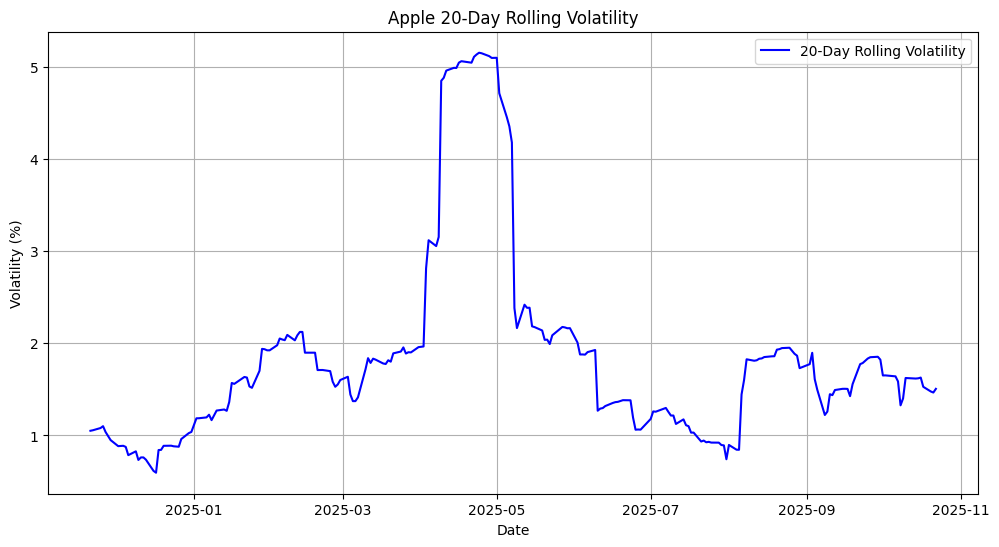

Price            Close  Rolling_Volatility
Date                                      
2025-04-04  187.920029            3.118729
2025-04-07  181.016922            3.055581
2025-04-08  171.998993            3.154230
2025-04-09  198.364456            4.848774
2025-04-10  189.955048            4.881460


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate daily percentage changes
daily_returns = aapl['Close'].pct_change()

# Calculate 20-day rolling volatility (standard deviation)
aapl['Rolling_Volatility'] = daily_returns.rolling(window=20).std() * 100  # in percentage

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(aapl.index, aapl['Rolling_Volatility'], label='20-Day Rolling Volatility', color='blue')
plt.title('Apple 20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)
plt.show()

# Identify threshold for high volatility days
mean_vol = aapl['Rolling_Volatility'].mean()
std_vol = aapl['Rolling_Volatility'].std()
threshold = mean_vol + std_vol

# Filter days where volatility > mean + std
high_vol_days = aapl[aapl['Rolling_Volatility'] > threshold][['Close', 'Rolling_Volatility']]

# Display the first few high volatility days
print(high_vol_days.head())

## Step 6: Report Generation

- To generate a report summarizing the insights, use a prompt like this:
  
  > Use gpt-4.1-mini to generate a summary that takes in these variables:
  > - ticker: stock ticker (string)
  > - start_date: analysis starting period (string)
  > - end_date: analysis end period (string)
  > - numerical metrics: total_return & volatility (in percentage)
  > - peak_date, peak_price
  > - lowest_date, lowest_price
  > - high_vol_days: pandas DataFrame showing high volatility days
  > - news_snippets: string containing snippet of news for the peak and lowest dates
  >
  > The OpenAI API key is stored in the .env file. The variables are already defined in the notebook.

In [12]:
from openai import OpenAI
import os
from dotenv import load_dotenv

# Load environment variables from .env
load_dotenv()

# Initialize OpenAI client
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Create the prompt for the summary
prompt = f"""
Generate a concise stock performance summary using the following information:

Ticker: {ticker}
Analysis Period: {start_date} to {end_date}

Metrics:
- Total Return: {total_return:.2f}%
- Overall Volatility: {volatility:.2f}%

Price Highlights:
- Peak Date: {peak_date}, Peak Price: {peak_price:.2f}
- Lowest Date: {lowest_date}, Lowest Price: {lowest_price:.2f}

High Volatility Days (sample):
{high_vol_days.head().to_string(index=True)}

Relevant News:
{news_snippets}

Please provide a natural-language summary suitable for a market report.
"""

# Query GPT-4.1-mini
response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[
        {"role": "system", "content": "You are a financial analyst writing a market summary."},
        {"role": "user", "content": prompt}
    ]
)

# Extract and display the generated summary
summary = response.choices[0].message.content
print(summary)

Between October 24, 2024, and October 23, 2025, Apple Inc. (AAPL) delivered a total return of 12.61%, accompanied by a moderate overall volatility of 2.07%. The stock experienced its lowest point on April 8, 2025, closing at $172.00 amid broader market concerns over tariffs and rising investor anxiety. In the days surrounding this low, volatility peaked, with April 9 seeing an especially notable spike. Subsequently, AAPL recovered steadily to reach its peak price of $262.77 on October 21, 2025. This peak coincided with a market environment shaped by mixed earnings reports in the tech sector and cautious optimism as major indexes showed record-setting activity. On October 27, 2025, Apple traded near $265, reflecting its strong recovery and investor confidence despite sector headwinds. Overall, Apple demonstrated resilience and growth over the year amidst a fluctuating market landscape.
